# Explore Length Of Service (LOS) dataset 

In [1]:
import pandas as pd

In [2]:
fileIn = "C:\\Users\\patri\\OneDrive\\Projects\\pyton\\LOS\\data\\train_data.csv"
df = pd.read_csv(fileIn)
df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [3]:
df['Stay'] = df['Stay'].replace('More than 100 Days', "100+" )
set(df['Stay'])

{'0-10',
 '100+',
 '11-20',
 '21-30',
 '31-40',
 '41-50',
 '51-60',
 '61-70',
 '71-80',
 '81-90',
 '91-100'}

In [4]:
df.columns 

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay'],
      dtype='object')

### Set up ploting procs 

In [5]:
def graph_relationship(label): 
   
    # Import Libraries 
    import seaborn as sns 
    import matplotlib.pyplot as plt 

    # Create the order of display 
    order = ['0-10', '11-20',  '21-30',  '31-40',  '41-50', '51-60', '61-70', '71-80', '81-90', '91-100', '100+']

    # Plot the graph 
    ax =  sns.countplot(data=df, x='Stay', hue=label, order=order)

    # Rotate x-axis tick labels by 45 degrees
    ax.tick_params(axis='x', labelrotation=45)

    # Optional: Adjust layout to prevent labels from overlapping
    plt.tight_layout()

    # Set the label 
    ax.set_xlabel('Length of Stay (Days)')
    ax.set_ylabel('Number of Observations')

    # Display the plot
    plt.show()

    return 0 

In [6]:
def graph_dimension(label): 
    
    # Import Libraries 
    import seaborn as sns 
    import matplotlib.pyplot as plt 
    
    # Plot Distribution Graph 
    ax =  sns.countplot(data=df, x=label)

    # Rotate x-axis tick labels by 45 degrees
    ax.tick_params(axis='x', labelrotation=45)

    # Optional: Adjust layout to prevent labels from overlapping
    plt.tight_layout()

    # Display the plot
    plt.show()

    return 0 

###  Just the Target dimension ("Stay")

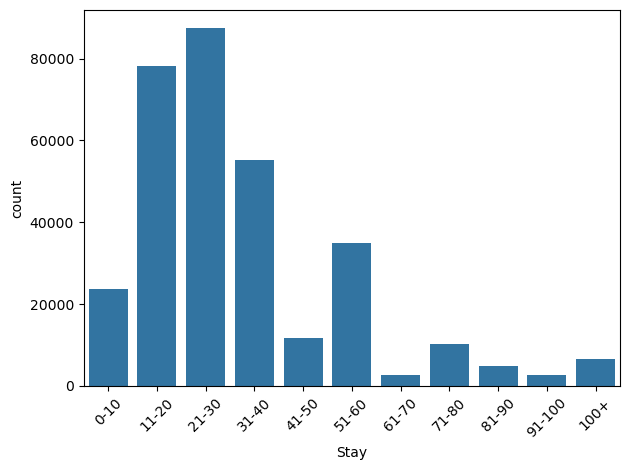

In [7]:
label = 'Stay'

# Create the order of display 
order = ['0-10', '11-20',  '21-30',  '31-40',  '41-50', '51-60', '61-70', '71-80', '81-90', '91-100', '100+']

# Import Libraries 
import seaborn as sns 
import matplotlib.pyplot as plt 
    
# Plot Distribution Graph 
ax =  sns.countplot(data=df, x=label, order=order)

# Rotate x-axis tick labels by 45 degrees
ax.tick_params(axis='x', labelrotation=45)

# Optional: Adjust layout to prevent labels from overlapping
plt.tight_layout()

# Display the plot
plt.show()

In [11]:
def redefine_LOS(label): 
    if label == '0-10': 
        return 'short'
    elif label == '11-20': 
        return 'short'
    elif label == '21-30': 
        return 'medium' 
    elif label == '31-40': 
        return 'medium'
    else:
        return 'long'  

In [12]:
def process_row(row):
    temp = row['Stay']
    temp1 = redefine_LOS(temp) 
    return temp1

df['LOS'] = df.apply(process_row, axis=1)

df.head()


,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,LOS
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10,short
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50,long
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40,medium
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50,long
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50,long


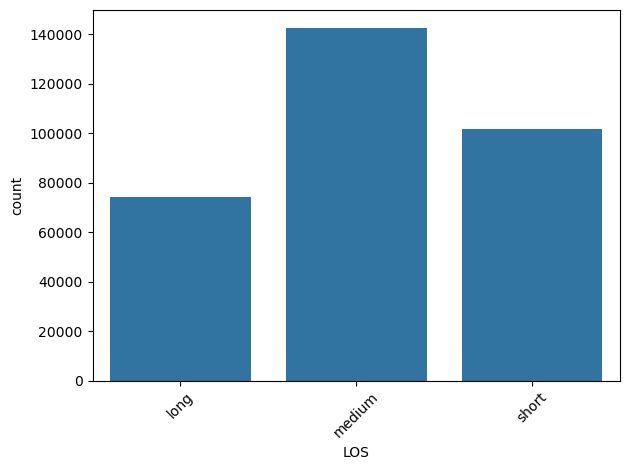

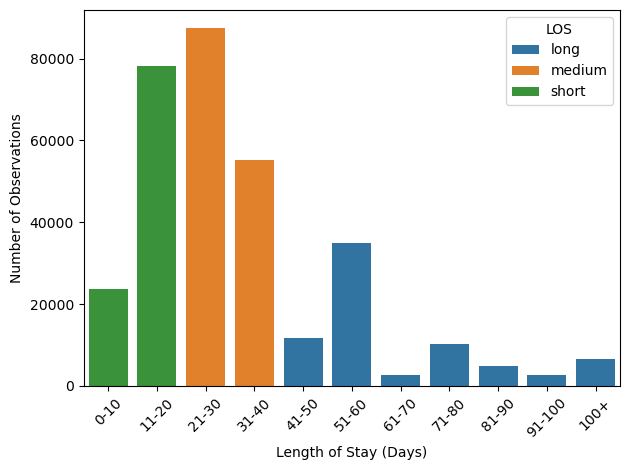

0

In [13]:
label = "LOS"
set(df[label])
df[label] = df[label].astype('category')

graph_dimension(label)
graph_relationship(label)

### Ward_Type

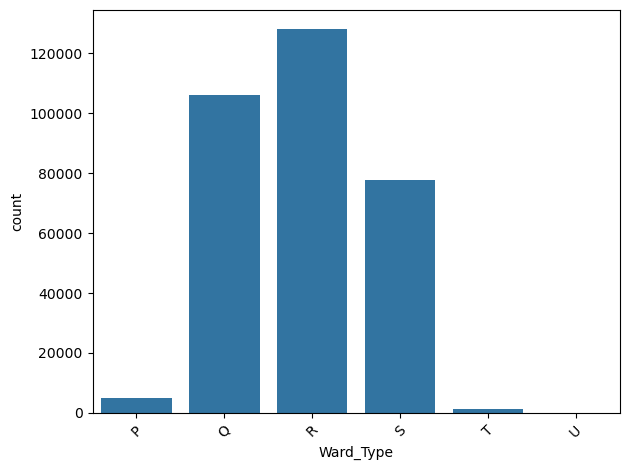

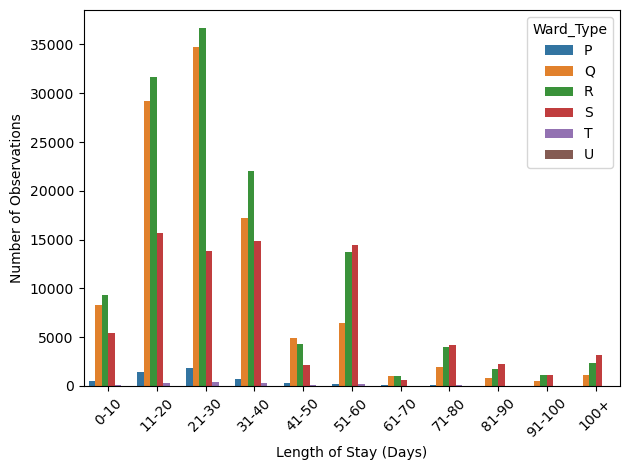

0

In [14]:
label = "Ward_Type"
set(df[label])
df[label] = df[label].astype('category')

graph_dimension(label)
graph_relationship(label)

### Bed Grade

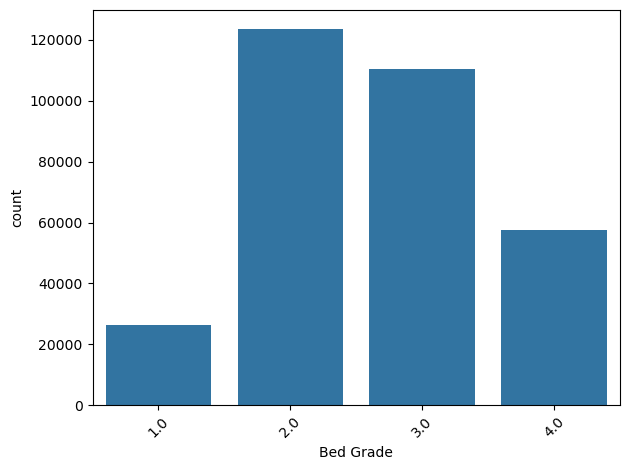

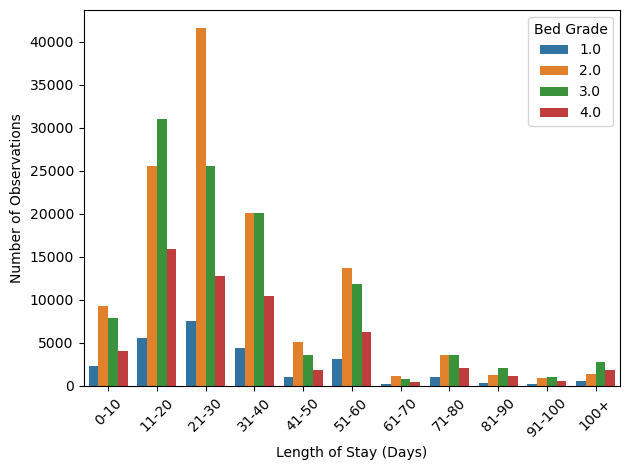

0

In [15]:
label = "Bed Grade"

df[label] = df[label].astype('category')

graph_dimension(label)
graph_relationship(label)

### Type of Admission

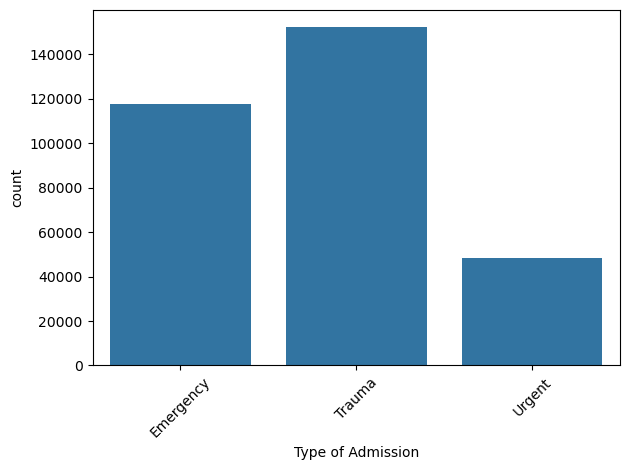

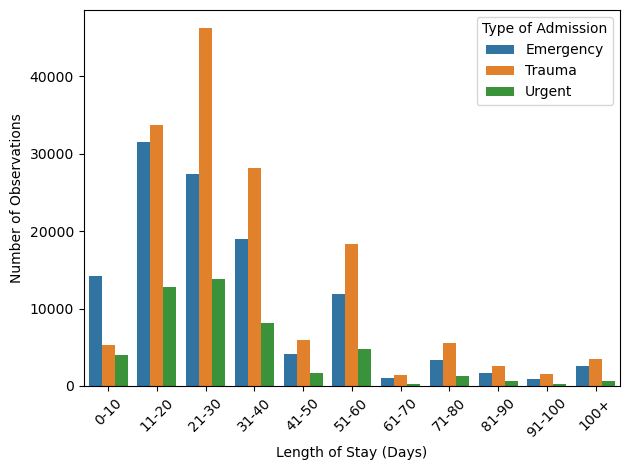

0

In [16]:
label = "Type of Admission"

set(df[label])
df[label] = df[label].astype('category')

graph_dimension(label)
graph_relationship(label)

### Severity of Illness

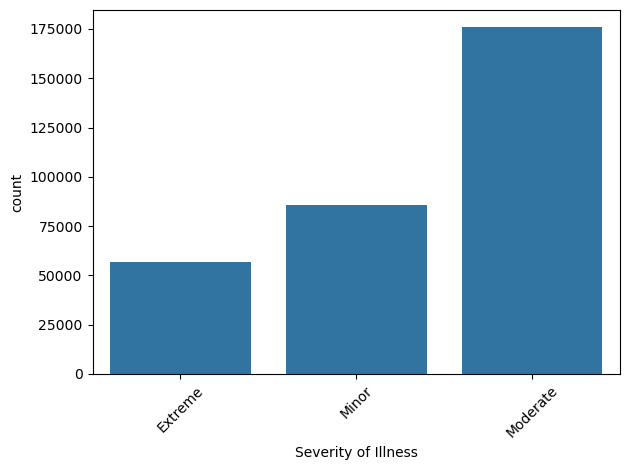

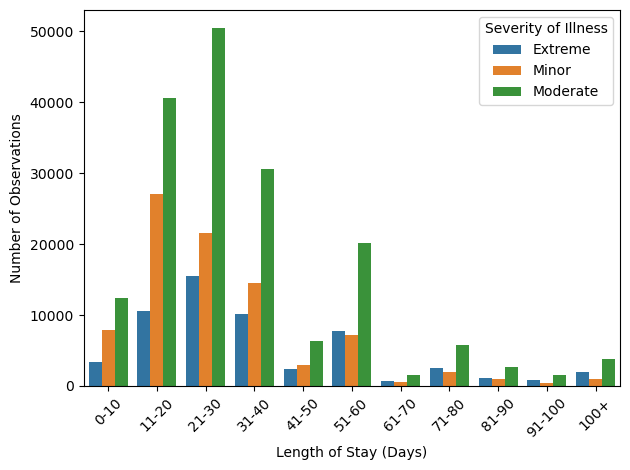

0

In [17]:
label = "Severity of Illness"

set(df[label])
df[label] = df[label].astype('category')

graph_dimension(label)
graph_relationship(label) 

### Visitors with Patient

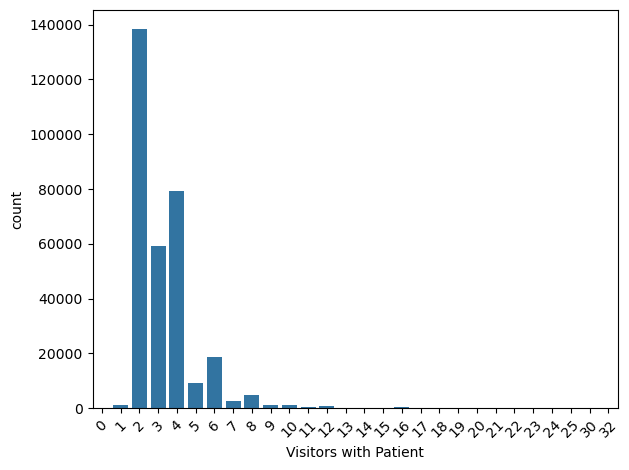

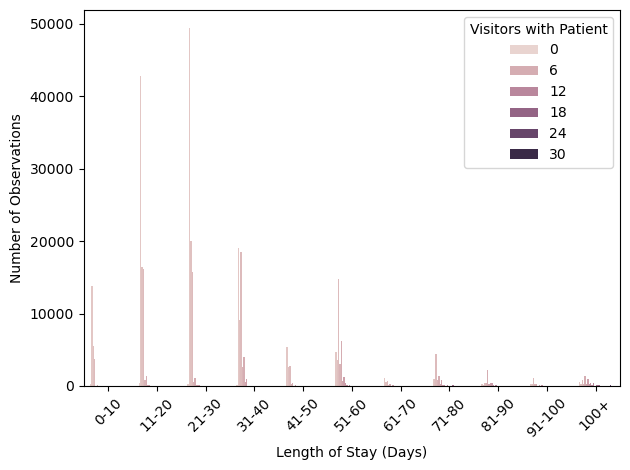

0

In [18]:
label = "Visitors with Patient"

# set(df[label])
# df[label] = df[label].astype('int')

graph_dimension(label)
graph_relationship(label)

<Axes: xlabel='Visitors with Patient', ylabel='Count'>

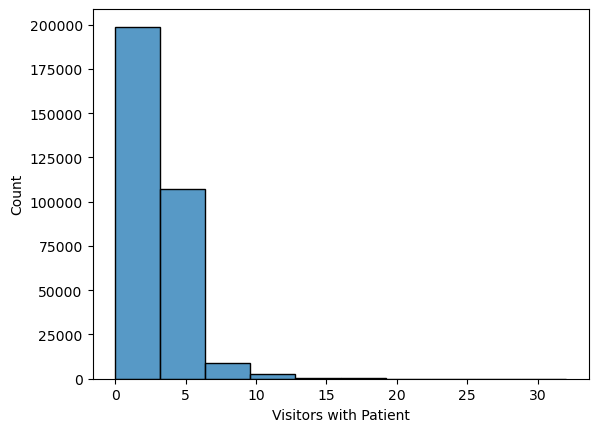

In [19]:
import seaborn as sns 
import matplotlib.pyplot as plt 
sns.histplot(data=df, x=label, bins=10)

### Age

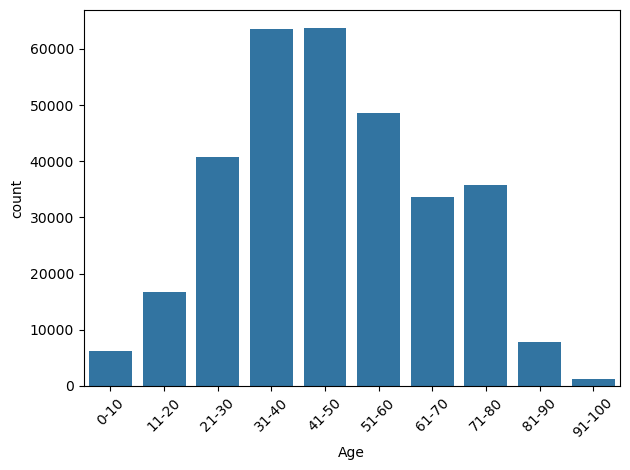

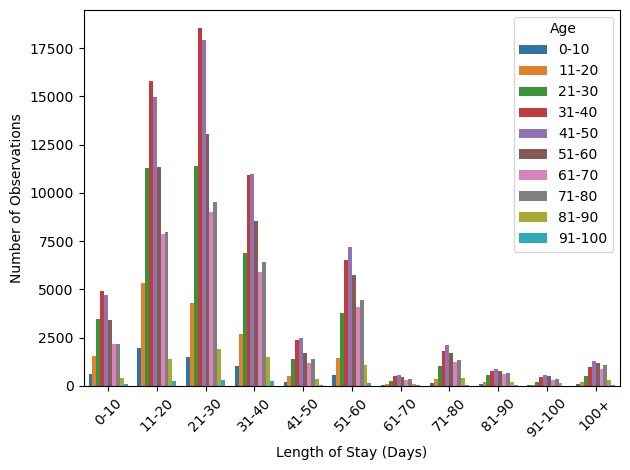

0

In [20]:
label = "Age"

set(df[label])
df[label] = df[label].astype('category')

graph_dimension(label) 
graph_relationship(label) 

### Admission_Deposit

<Axes: xlabel='Admission_Deposit', ylabel='Count'>

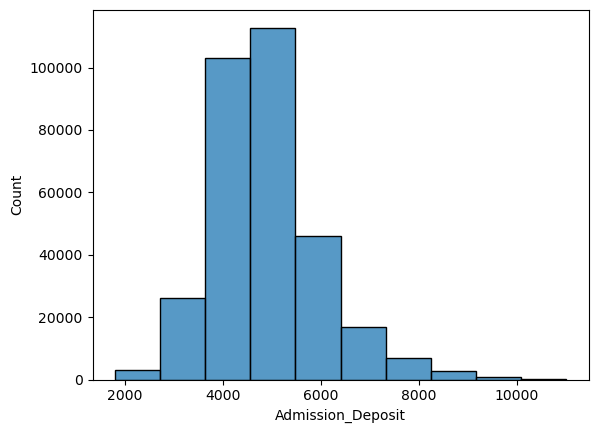

In [21]:
label = "Admission_Deposit"

df[label] = df[label].astype('int')

sns.histplot(data=df, x=label, bins=10)

### City Code 

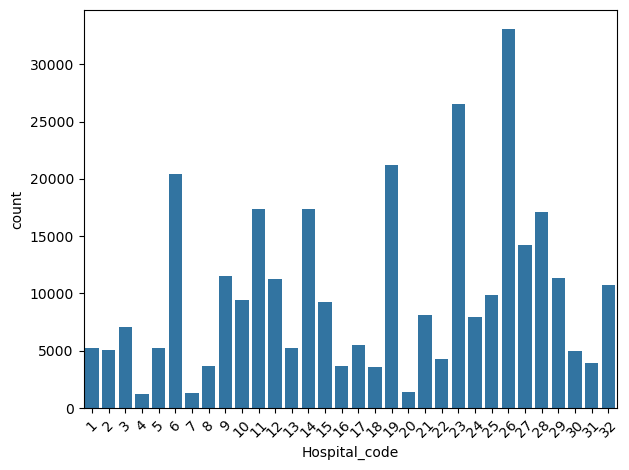

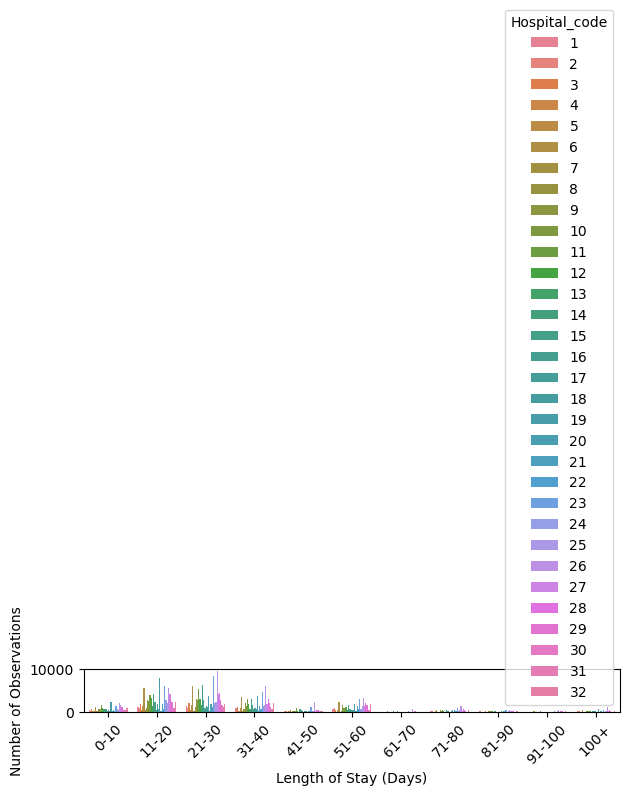

0

In [22]:
label = "Hospital_code"

set(df[label])
df[label] = df[label].astype('category')

graph_dimension(label) 
graph_relationship(label) 

### City Code Hopital

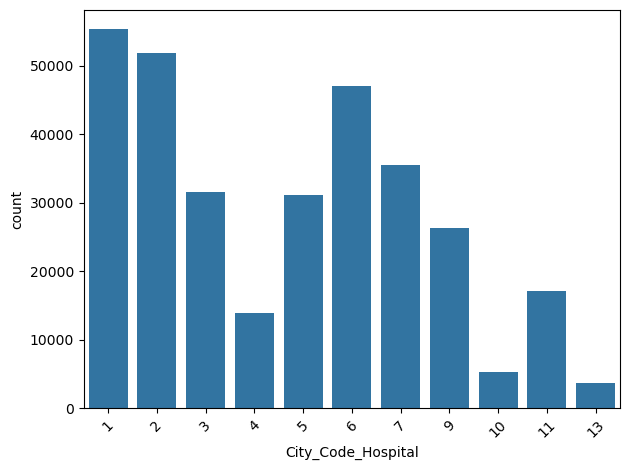

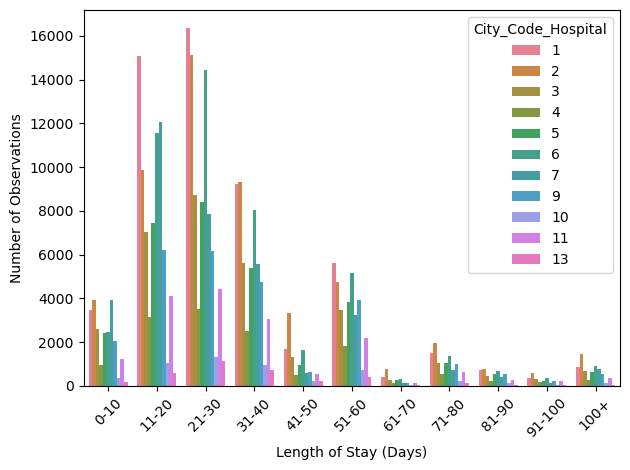

0

In [23]:
label = "City_Code_Hospital"

set(df[label])
df[label] = df[label].astype('category')

graph_dimension(label) 
graph_relationship(label) 

In [24]:
df.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay', 'LOS'],
      dtype='object')

### Save cleaned dataset 

In [25]:
fileOut = "C:\\Users\\patri\\OneDrive\\Projects\\pyton\\LOS\\data\\train_data.pkl"
df.to_pickle(fileOut)